In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import isodate

In [42]:
video_df = pd.read_csv('data/YT_DS_channels_data.csv')

### Data Preprocessing

In [8]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6815 entries, 0 to 6814
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        6815 non-null   object
 1   channelTitle    6815 non-null   object
 2   title           6815 non-null   object
 3   description     6815 non-null   object
 4   tags            6235 non-null   object
 5   publishedAt     6815 non-null   object
 6   viewCount       6815 non-null   object
 7   likeCount       6805 non-null   object
 8   favouriteCount  0 non-null      object
 9   commentCount    6026 non-null   object
 10  duration        6815 non-null   object
 11  definition      6815 non-null   object
 12  caption         6815 non-null   object
dtypes: object(13)
memory usage: 692.3+ KB


In [9]:
video_df.isna().sum()

video_id             0
channelTitle         0
title                0
description          0
tags               580
publishedAt          0
viewCount            0
likeCount           10
favouriteCount    6815
commentCount       789
duration             0
definition           0
caption              0
dtype: int64

In [10]:
video_df.drop('favouriteCount',axis=1,inplace=True)

In [11]:
numeric_columns = ['viewCount','likeCount','commentCount']
video_df[numeric_columns]  = video_df[numeric_columns].apply(pd.to_numeric,axis=1)

In [12]:
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'])
video_df['publishedDayName'] = video_df['publishedAt'].dt.day_name()

In [13]:



video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')
video_df['durationMin'] = video_df['durationSecs'].apply(lambda x: round(x/60,2))

In [14]:
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [15]:
video_df['titleLength'] = video_df['title'].apply(lambda x: len(x))
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,publishedDayName,durationSecs,durationMin,tagCount,titleLength
0,ACTr64lA_rI,Emma Ding,Ace Statistics Interviews: A Data-driven Appro...,"In this video, we're going to explore the top ...","[Data Science, Data Science Interview, Emma Di...",2023-06-26 16:00:15+00:00,3522.0,147.0,8.0,PT14M,hd,false,Monday,840.0,14.00,4,69
1,AXXVKv684Rw,Emma Ding,What is Two-sample T-test? Easy Explanation fo...,"The t-test is one of the most basic, and commo...","[Data Science, Data Science Interview, Emma Di...",2023-06-20 16:00:12+00:00,678.0,18.0,9.0,PT13M13S,hd,false,Tuesday,793.0,13.22,4,71
2,q9OLpWCG_yI,Emma Ding,What is One-sample T-test? Easy Explanation fo...,"The t-test is one of the most basic, and commo...","[Data Science, Data Science Interview, Emma Di...",2023-06-16 16:00:46+00:00,676.0,19.0,2.0,PT11M23S,hd,false,Friday,683.0,11.38,4,71
3,csh6JG8fgTw,Emma Ding,Is Data Science a Dying Career? Data Science J...,The big question we're addressing today is: Is...,"[Data Science, Data Science Interview, Emma Di...",2023-06-05 16:00:22+00:00,4861.0,105.0,22.0,PT13M38S,hd,false,Monday,818.0,13.63,7,63
4,mvFGPponA_8,Emma Ding,I Got Laid Off. I Now Earn Twice As Much (As a...,"In this video, I share how I doubled my income...","[Data Science, Data Science Interview, Emma Di...",2023-05-22 16:00:35+00:00,2609.0,58.0,10.0,PT11M43S,hd,true,Monday,703.0,11.72,8,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6810,XNgt7F6FqDU,StatQuest with Josh Starmer,"The standard error, Clearly Explained!!!",This StatQuest explains what the standard erro...,"[Standard Error, bootstrapping, statquest, Sta...",2015-05-12 14:10:24+00:00,181763.0,3811.0,213.0,PT11M44S,sd,true,Tuesday,704.0,11.73,4,40
6811,fglJIFv08hs,StatQuest with Josh Starmer,Wrapping up dumplings for pot stickers.,Here's how to wrap up a dumpling that can be m...,"[Dumpling (Type Of Dish), pot stickers, Chines...",2015-04-19 21:18:04+00:00,8229.0,97.0,15.0,PT23S,hd,false,Sunday,23.0,0.38,4,39
6812,2AQKmw14mHM,StatQuest with Josh Starmer,"R-squared, Clearly Explained!!!",R-squared is one of the most useful metrics in...,"[Coefficient Of Determination, r squared]",2015-02-03 14:48:20+00:00,526882.0,11525.0,683.0,PT11M1S,sd,true,Tuesday,661.0,11.02,2,31
6813,Sn-keVh_ERw,StatQuest with Josh Starmer,onion-dice,"This is how I dice an onion, letting the layer...",[iMovie],2014-09-28 16:12:29+00:00,9544.0,121.0,27.0,PT36S,hd,false,Sunday,36.0,0.60,1,10


# EDA

In [16]:

df['subscribers'] = df['subscribers'].astype(int)
df['views'] = df['views'].astype(int)
df['total_videos'] = df['total_videos'].astype(int)

### Subscribers count per channel

<Axes: xlabel='subscribers', ylabel='channel_name'>

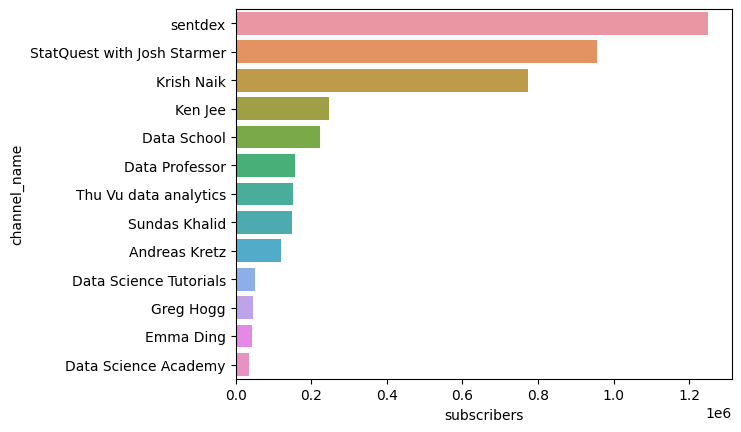

In [17]:
sns.barplot(df.sort_values('subscribers',ascending=False),y='channel_name',x='subscribers',orient='h')

### Views count per channel

<Axes: xlabel='views', ylabel='channel_name'>

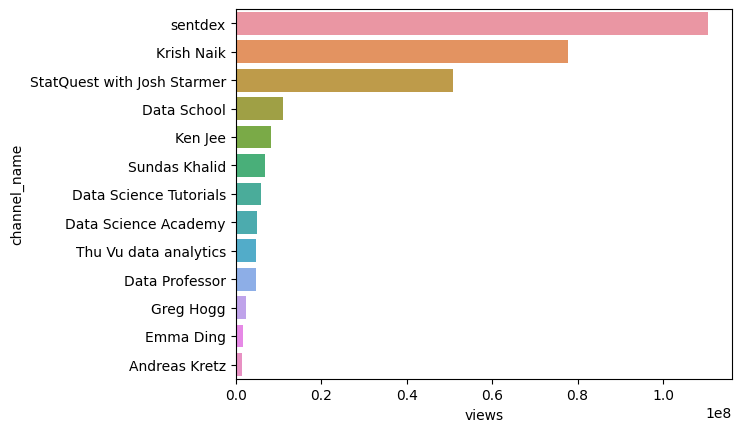

In [18]:

sns.barplot(df.sort_values('views',ascending=False),y='channel_name',x='views',orient='h')


### Views vs Subscribers

<Axes: xlabel='subscribers', ylabel='views'>

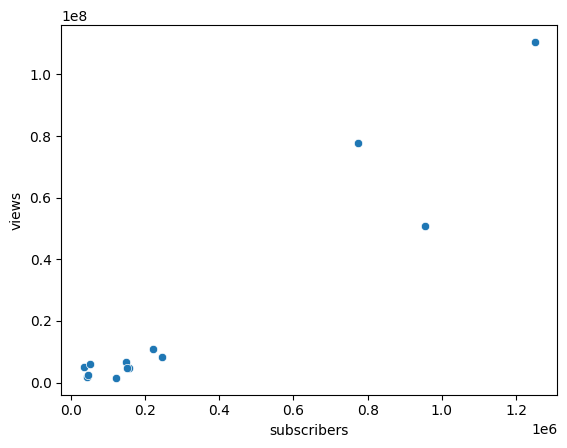

In [19]:
sns.scatterplot(data=df,x='subscribers',y='views')

There is a positive relation between number of subscribers and views

### Views per Video

<Axes: xlabel='views_per_video', ylabel='channel_name'>

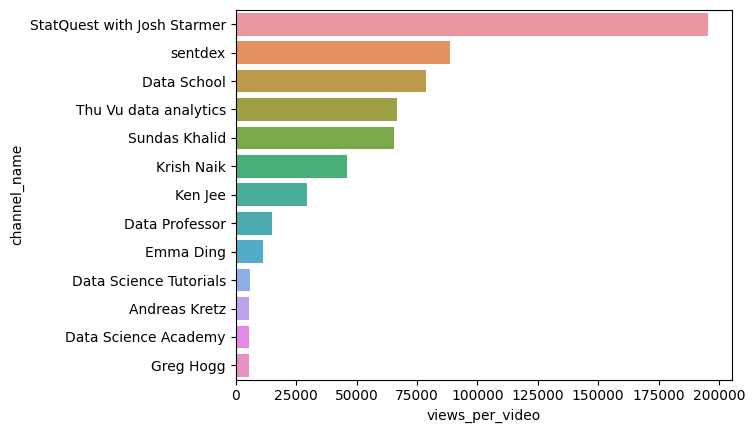

In [20]:
df['views_per_video'] = df.apply(lambda x: round(x['views'] / x['total_videos']),axis=1)
sns.barplot(df.sort_values('views_per_video',ascending=False),y='channel_name',x='views_per_video',orient='h')


### Distribution of views per channel

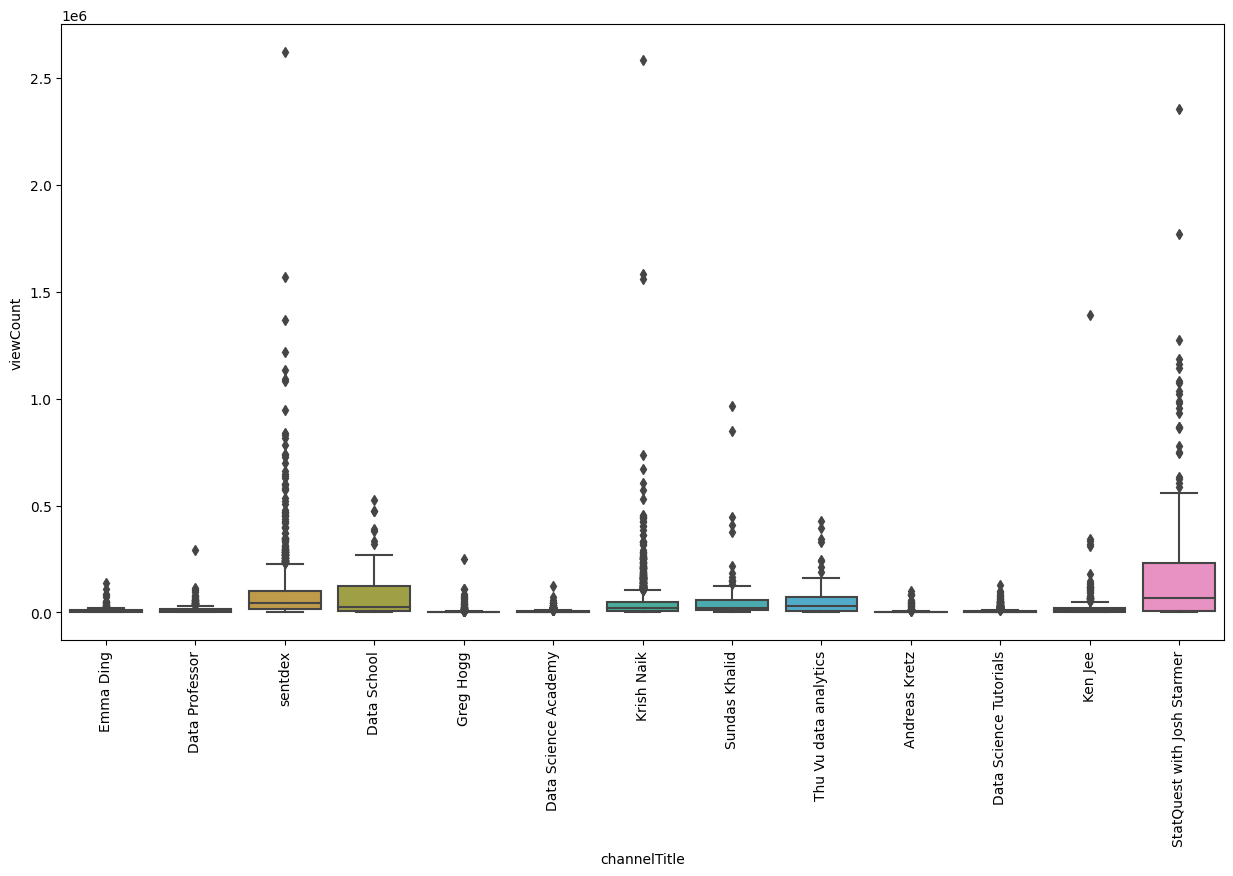

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(x=video_df['channelTitle'],y=video_df['viewCount'])
plt.xticks(rotation=90);

## Does number of likes and comments matter for a video to get more views?

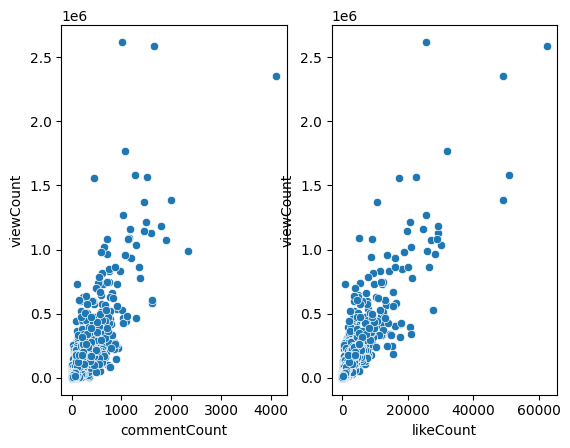

In [38]:

fig,ax = plt.subplots(1,2)

sns.scatterplot(data=video_df,x='commentCount',y='viewCount',ax=ax[0])
sns.scatterplot(data=video_df,x='likeCount',y='viewCount',ax=ax[1]);


Based on the plots, number of comments and likes does show strong relationship with the views

## Does duration matter for views, likes and comments?

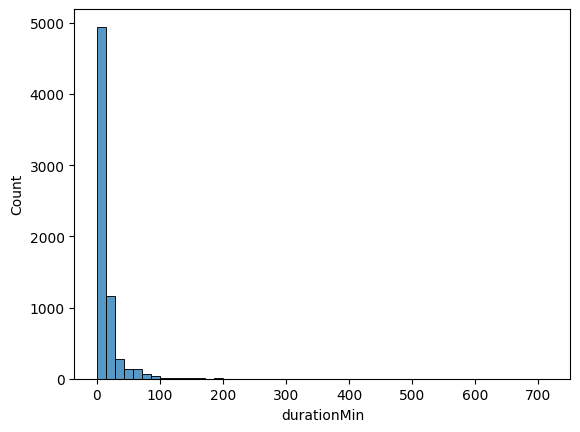

In [23]:
sns.histplot(data=video_df,x='durationMin',bins=50);

#### Views vs duration

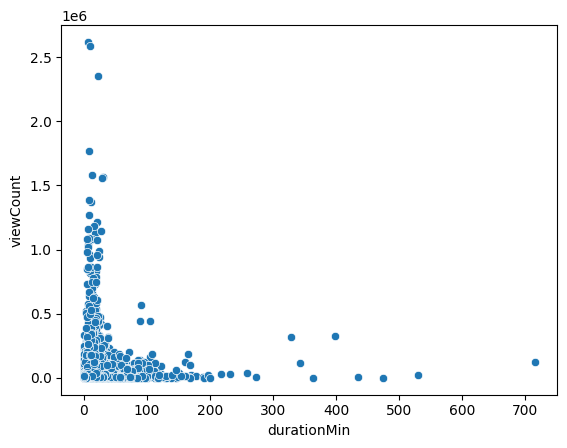

In [26]:

sns.scatterplot(data=video_df,x='durationMin',y='viewCount');



We can observe that videos with shorter duration has more views

### Views vs likes and comments

<Axes: xlabel='durationMin', ylabel='likeCount'>

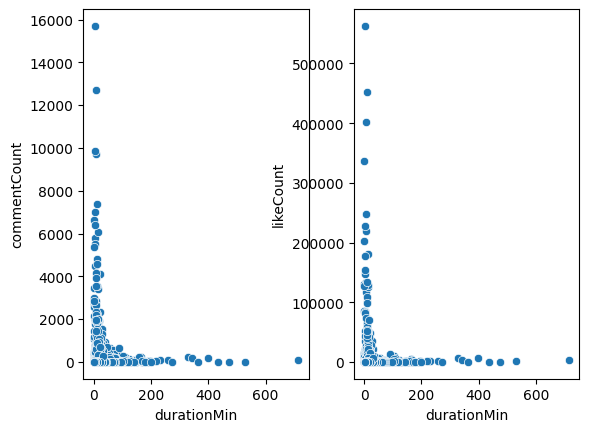

In [43]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "durationMin", y = "commentCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "durationMin", y = "likeCount", ax=ax[1])

Similarly, videos with short duration attract more commments and likes

## Does title length has any influence on views?

<Axes: xlabel='titleLength', ylabel='viewCount'>

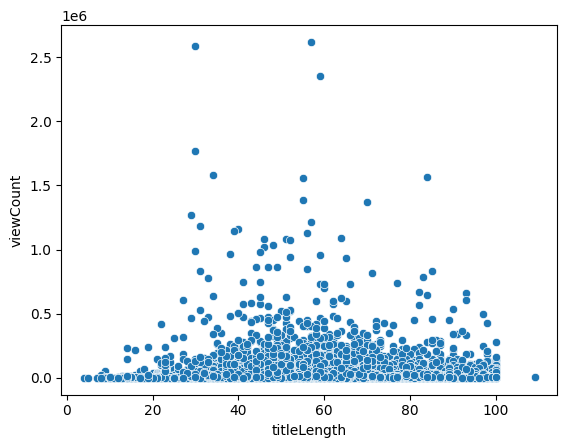

In [27]:

sns.scatterplot(data = video_df, x = "titleLength", y = "viewCount")

There is no clear relationship between title length and views

## Does number of tags has any influence on view count?

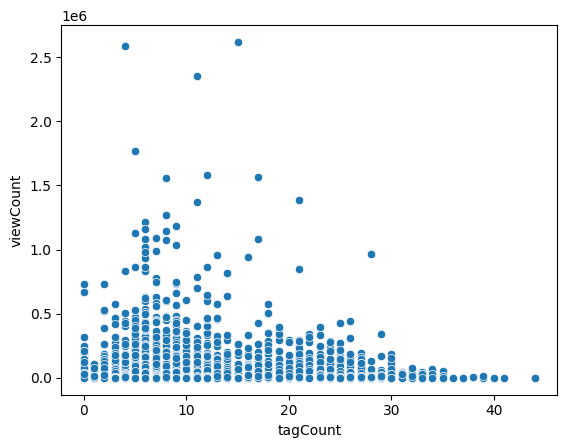

In [28]:
sns.scatterplot(data = video_df, x = "tagCount", y = "viewCount");

Ther is no clear relationship between number of tags and views. But, most of the videos has an average tag count of 5-10.

## WordCount for words in Title

In [30]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

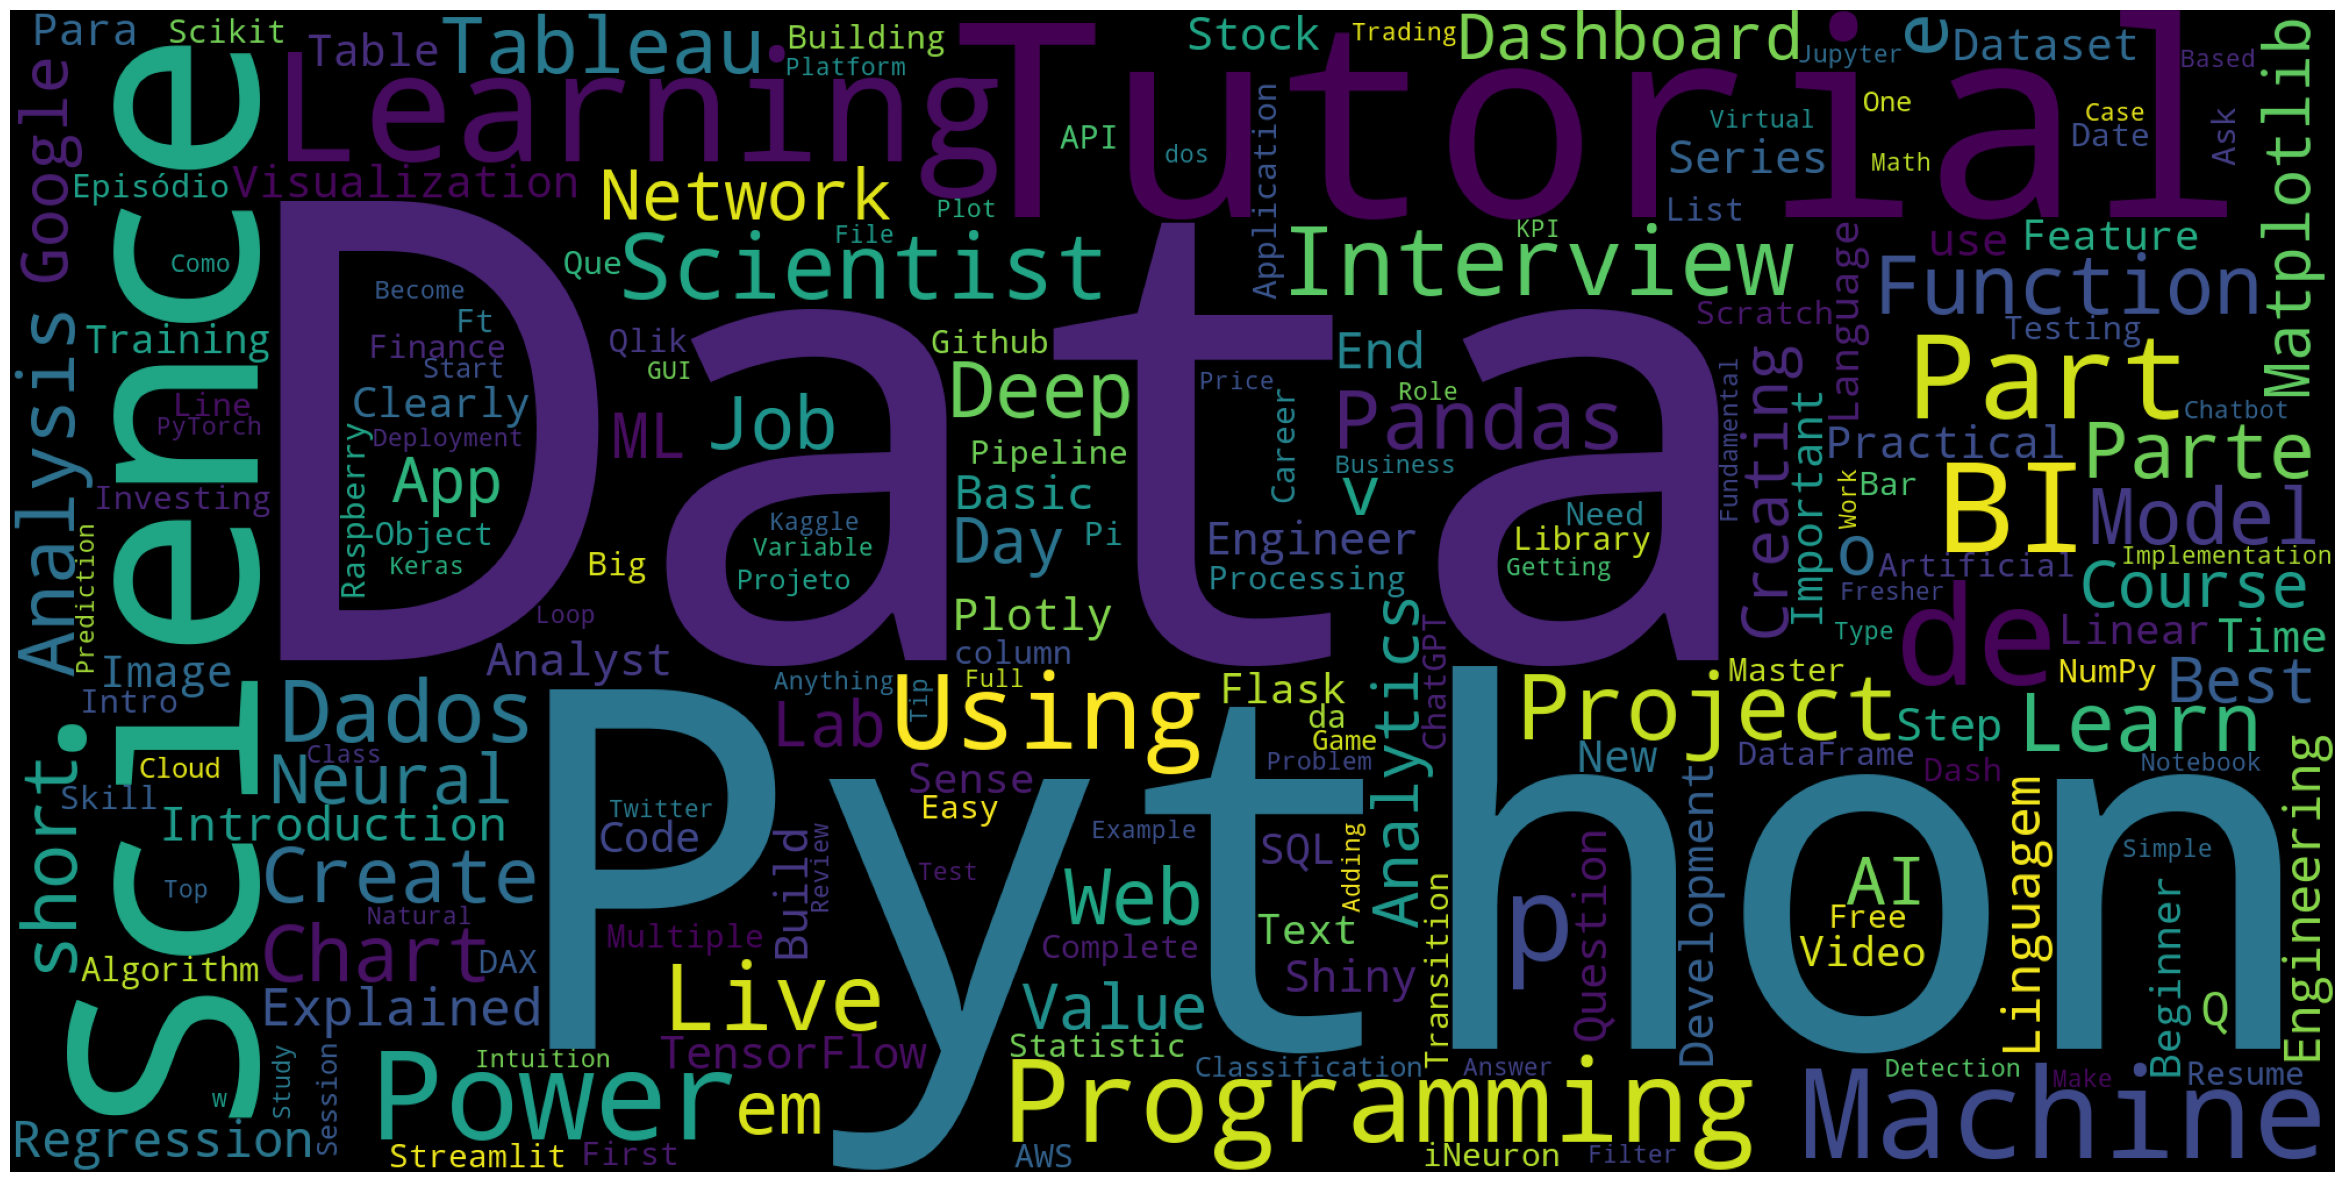

In [31]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off")

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

Most common words are Data, Python, Turorial, Science, programming.

## Which day in the week most videos uploaded?

Text(0, 0.5, 'Count')

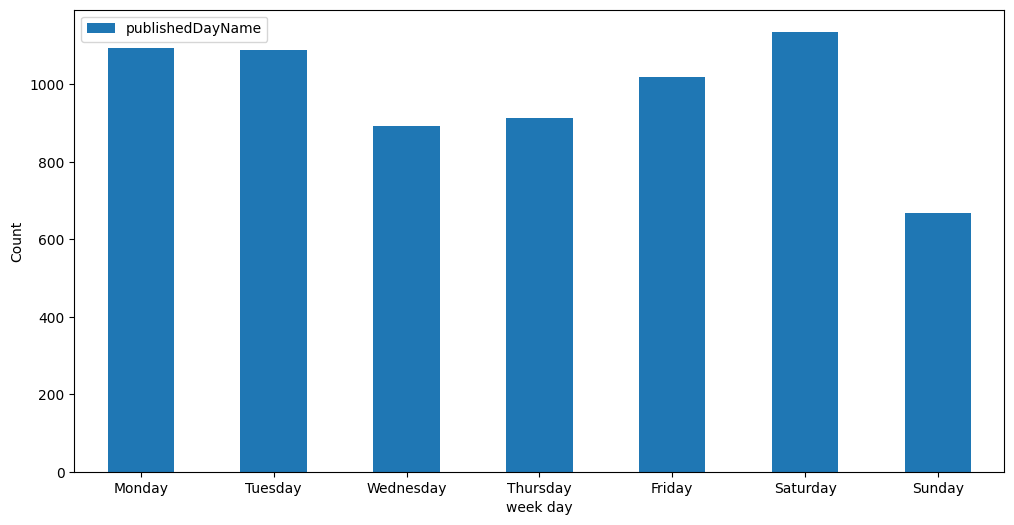

In [37]:
day_df = pd.DataFrame(video_df['publishedDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)

day_df.reset_index().plot.bar(x='index', y='publishedDayName', rot=0,figsize=(12,6));
plt.xlabel('week day')
plt.ylabel('Count')


Most of the videos are uploaded on saturday, Monday and Tuesday.